In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("url_dataset.csv")
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [3]:
df.drop(["FILENAME"], axis=1,inplace=True)

In [4]:
from scipy.stats import pointbiserialr

# Calculate Point Biserial Correlation for each numeric feature with the label
correlations = {}
for column in df.drop('label', axis=1).select_dtypes(include=['number']).columns:
    correlations[column], _ = pointbiserialr(df[column], df['label'])

# Sort correlations in descending order
correlations = dict(sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True))

print("Point Biserial Correlation of all numeric features with 'label':\n", correlations)


Point Biserial Correlation of all numeric features with 'label':
 {'URLSimilarityIndex': 0.8603580349950416, 'HasSocialNet': 0.784254504861124, 'HasCopyrightInfo': 0.743357512157592, 'HasDescription': 0.6902317838721048, 'IsHTTPS': 0.6091318990621629, 'DomainTitleMatchScore': 0.5849045815469625, 'HasSubmitButton': 0.5785609362364236, 'IsResponsive': 0.5486075477021928, 'URLTitleMatchScore': 0.5394186582390925, 'SpacialCharRatioInURL': -0.5335367395645922, 'HasHiddenFields': 0.507731463177058, 'HasFavicon': 0.4937106614079674, 'URLCharProb': 0.46974858996040497, 'CharContinuationRate': 0.467735299834103, 'HasTitle': 0.4597246819667802, 'DegitRatioInURL': -0.4320321484693691, 'Robots': 0.3926199329567408, 'NoOfJS': 0.3735000743129795, 'LetterRatioInURL': -0.36779433694228847, 'Pay': 0.35974655776652115, 'NoOfOtherSpecialCharsInURL': -0.35889078989755885, 'NoOfSelfRef': 0.31621093459414207, 'DomainLength': -0.2831518897971005, 'NoOfImage': 0.27465767711049166, 'LineOfCode': 0.272256903885

In [5]:
from sklearn.feature_selection import mutual_info_classif
columns = df.select_dtypes(include=['object']).columns
# Features and target variable
X = df.drop('label', axis=1)
X = X.drop(columns, axis=1)
y = df['label']

# Calculate mutual information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame to display mutual information scores
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

print("Mutual Information of all features with 'label':\n", mutual_info_df)


Mutual Information of all features with 'label':
                        Feature  Mutual Information
3           URLSimilarityIndex            0.681164
22                  LineOfCode            0.601542
49             NoOfExternalRef            0.561231
44                   NoOfImage            0.543898
47                 NoOfSelfRef            0.526870
46                      NoOfJS            0.501572
23           LargestLineLength            0.488808
45                     NoOfCSS            0.446841
36                HasSocialNet            0.420095
13            LetterRatioInURL            0.381689
43            HasCopyrightInfo            0.352053
32              HasDescription            0.306282
21                     IsHTTPS            0.256531
19  NoOfOtherSpecialCharsInURL            0.241901
25       DomainTitleMatchScore            0.216965
37             HasSubmitButton            0.209687
20       SpacialCharRatioInURL            0.206534
5            TLDLegitimateProb  

In [6]:
m_df = df.drop(['TLDLegitimateProb',
 'URLTitleMatchScore',
 'IsResponsive',
 'CharContinuationRate',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'NoOfEmptyRef',
 'URLLength',
 'NoOfiFrame',
 'HasHiddenFields',
 'HasTitle',
 'NoOfLettersInURL',
 'HasFavicon',
 'URLCharProb',
 'Robots',
 'DomainLength',
 'Pay',
 'NoOfSubDomain',
 'TLDLength',
 'NoOfPopup',
 'Bank',
 'NoOfQMarkInURL',
 'NoOfEqualsInURL',
 'HasExternalFormSubmit',
 'HasPasswordField',
 'Crypto',
 'IsDomainIP',
 'NoOfSelfRedirect',
 'NoOfAmpersandInURL',
 'ObfuscationRatio',
 'NoOfURLRedirect',
 'NoOfObfuscatedChar',
 'HasObfuscation'], axis=1)

In [7]:
import category_encoders as ce
binary_encoder = ce.BinaryEncoder(cols=['TLD'])
o_df = binary_encoder.fit_transform(m_df)


In [8]:
# Sepratating & assigning features and target columns to X & y
y = o_df['label']
X = o_df.drop(['label','URL','Domain','Title'],axis=1)
X.shape, y.shape

((235795, 27), (235795,))

In [25]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((188636, 27), (47159, 27))

# Result synopsis

In [23]:
X_train = X_train.drop(columns=['URLSimilarityIndex'], errors='ignore')
X_test = X_test.drop(columns=['URLSimilarityIndex'], errors='ignore')

## 1. Decision Tree

In [11]:
# Print the resultsimport pickle
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your model from the pickle file
with open("dec_tree_m.pkl", "rb") as file:
    model = pickle.load(file)

# Assuming x_test and y_test are already loaded or defined
# Make predictions using the loaded model
y_pred = model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9987277083907632
Precision: 0.9987277276875591
Recall: 0.9987277083907632
F1 Score: 0.998727716206058
Confusion Matrix:
[[20203    29]
 [   31 26896]]
Accuracy: 0.9987277083907632
Precision: 0.9987277276875591
Recall: 0.9987277083907632
F1 Score: 0.998727716206058
Confusion Matrix:
[[20203    29]
 [   31 26896]]


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def confusion_mat(y_test, y_pred):
  # Generate the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  # Create a Confusion Matrix
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

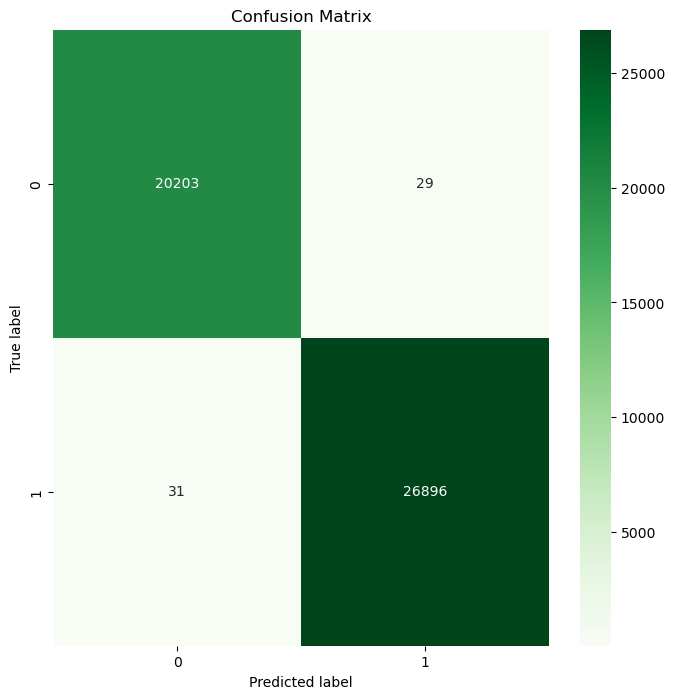

In [14]:
confusion_mat(y_test,y_pred)

## 2. XGBoost

In [15]:

# Load your model from the pickle file
with open("xgboost_model.pkl", "rb") as file:
    model = pickle.load(file)

# Assuming x_test and y_test are already loaded or defined
# Make predictions using the loaded model
y_pred = model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9997243368179987
Precision: 0.999724351281779
Recall: 0.9997243368179987
F1 Score: 0.9997243325801042
Confusion Matrix:
[[20223     9]
 [    4 26923]]
Accuracy: 0.9997243368179987
Precision: 0.999724351281779
Recall: 0.9997243368179987
F1 Score: 0.9997243325801042
Confusion Matrix:
[[20223     9]
 [    4 26923]]


c:\Users\sandesh lavshetty\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:31:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


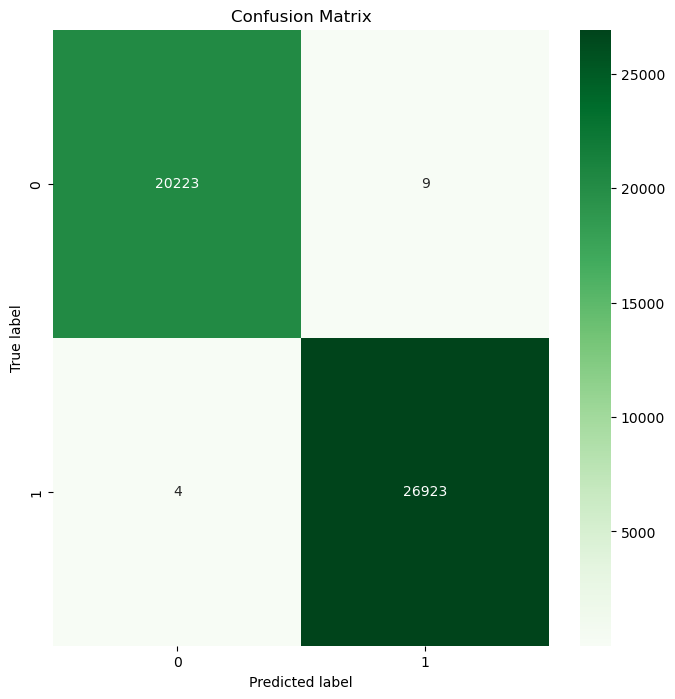

In [16]:
confusion_mat(y_test,y_pred)

## 3. Random Forrest

In [18]:
%pip install --upgrade numpy scikit-learn


  Using cached numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
langchain-community 0.0.29 requires langchain-core<0.2.0,>=0.1.33, but you have langchain-core 0.1.23 which is incompatible.
langchain-community 0.0.29 requires langsmith<0.2.0,>=0.1.0, but you have langsmith 0.0.87 which is incompatible.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# Load your model from the pickle file
with open("rf_model.pkl", "rb") as file:
    model = pickle.load(file)

# Assuming x_test and y_test are already loaded or defined
# Make predictions using the loaded model
y_pred = model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9996395173773829
Precision: 0.999639571735576
Recall: 0.9996395173773829
F1 Score: 0.9996395073958302
Confusion Matrix:
[[20219    13]
 [    4 26923]]
Accuracy: 0.9996395173773829
Precision: 0.999639571735576
Recall: 0.9996395173773829
F1 Score: 0.9996395073958302
Confusion Matrix:
[[20219    13]
 [    4 26923]]


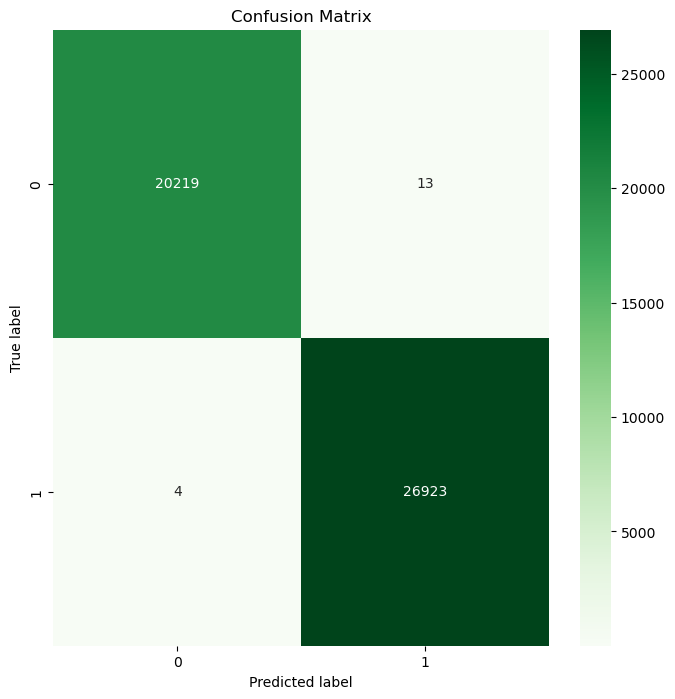

In [20]:
confusion_mat(y_test,y_pred)

## 4. SVM

In [26]:
# Load your model from the pickle file
with open("svm_model.pkl", "rb") as file:
    model = pickle.load(file)

# Assuming x_test and y_test are already loaded or defined
# Make predictions using the loaded model
y_pred = model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[20232     0]
 [    0 26927]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[20232     0]
 [    0 26927]]


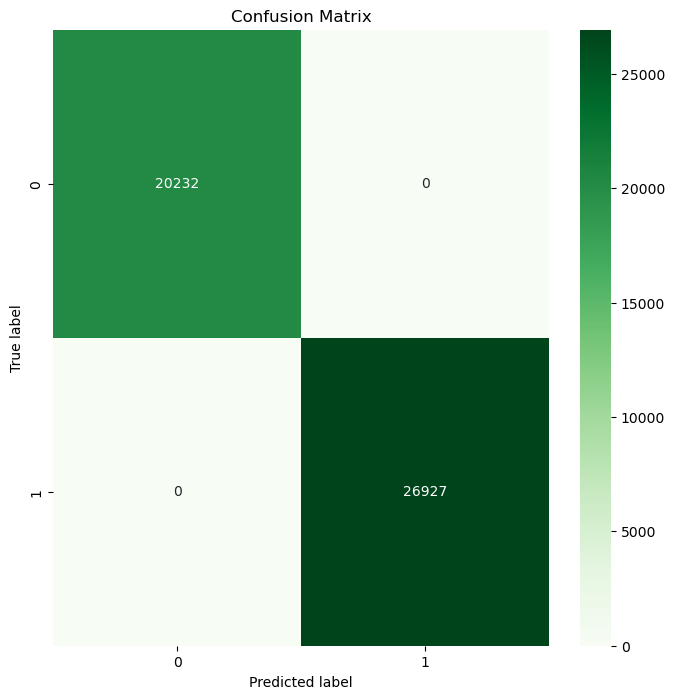

In [27]:
confusion_mat(y_test,y_pred)